### Part 1: Stable Diffusion Inference 🎇

In [ ]:
!nvidia-smi

Sat Jun 10 17:25:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    44W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!cd /content/
!git clone https://github.com/huggingface/diffusers.git
!pip install ./diffusers
!pip install -U -r /content/diffusers/examples/text_to_image/requirements.txt

Cloning into 'diffusers'...
remote: Enumerating objects: 27034, done.
remote: Counting objects: 100% (601/601), done.
remote: Compressing objects: 100% (344/344), done.
remote: Total 27034 (delta 362), reused 415 (delta 232), pack-reused 26433
Receiving objects: 100% (27034/27034), 18.48 MiB | 15.30 MiB/s, done.
Resolving deltas: 100% (19643/19643), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.1 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.18.0.dev0-py3-none-any.whl size=1081907 sha256=0effd279e8e5e42b67f6ac2a00a44b43bb19e3791898ecf9470fb294afe48454
  Stored in directory: /tmp/pip-ephem-wheel-cache-ckryzqkt/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully b

## Stable Diffusion V1 Inference Testing

Let's test out version 1.2 of the original model without any finetuning.

In [ ]:
from diffusers import StableDiffusionPipeline
import torch# Stable Diffusion V1
from PIL import Image

vae/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

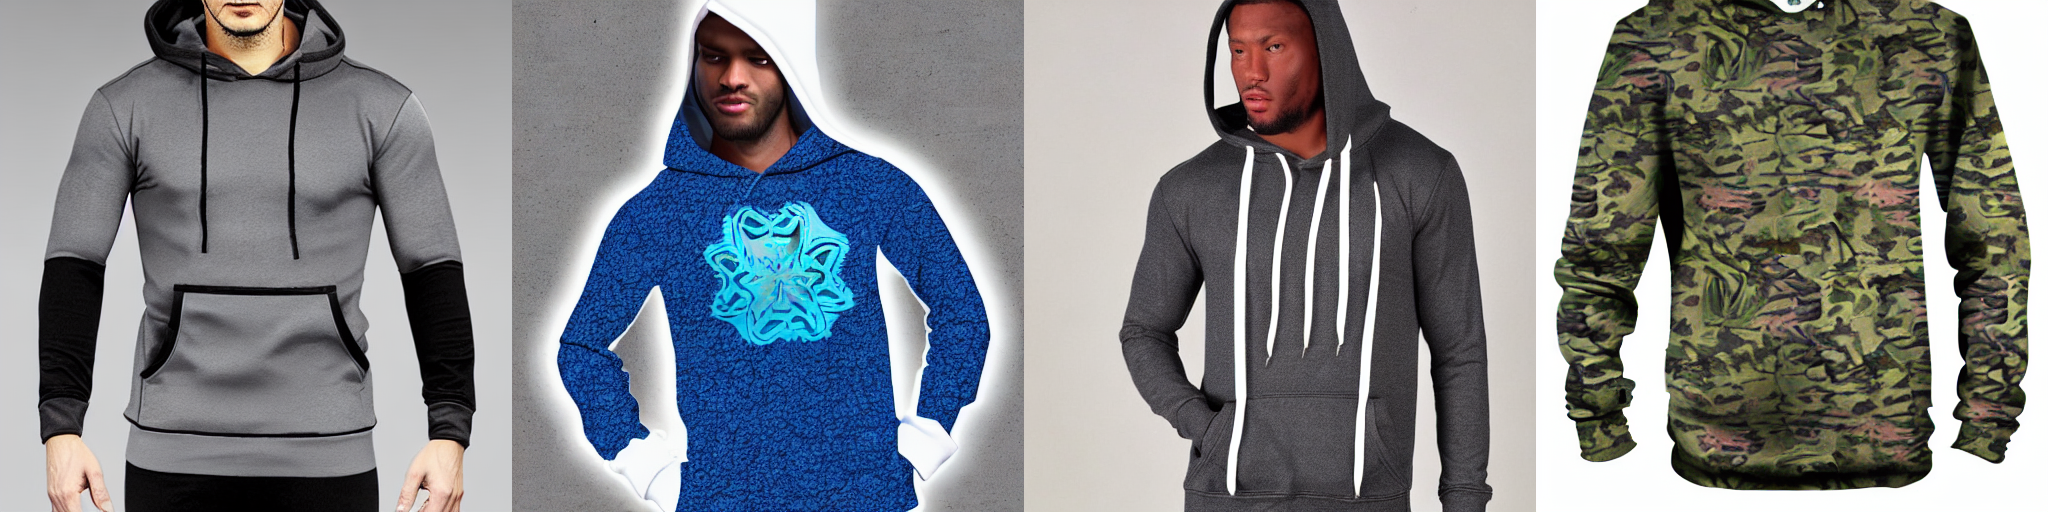

In [ ]:
# Stable Diffusion V1
model_path = "CompVis/stable-diffusion-v1-2"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="black hoodie with a front half zipper by martin valen").images[0]
image1.save("ProductSnapAI_panel_1.png")

image2 = pipe(prompt="white hoodie with a blue design by martin valen").images[0]
image2.save("ProductSnapAI_panel_2.png")

image3 = pipe(prompt="stripped hoodie by martin valen").images[0]
image3.save("ProductSnapAI_panel_3.png")

image4 = pipe(prompt="camouflage hoodie by martin valen").images[0]
image4.save("ProductSnapAI_panel_4.png")

# Image grid helper function from HuggingFace
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid

## Stable Diffusion V2 Inference Testing

Let's test out version 2.1 of the original model without any finetuning.

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

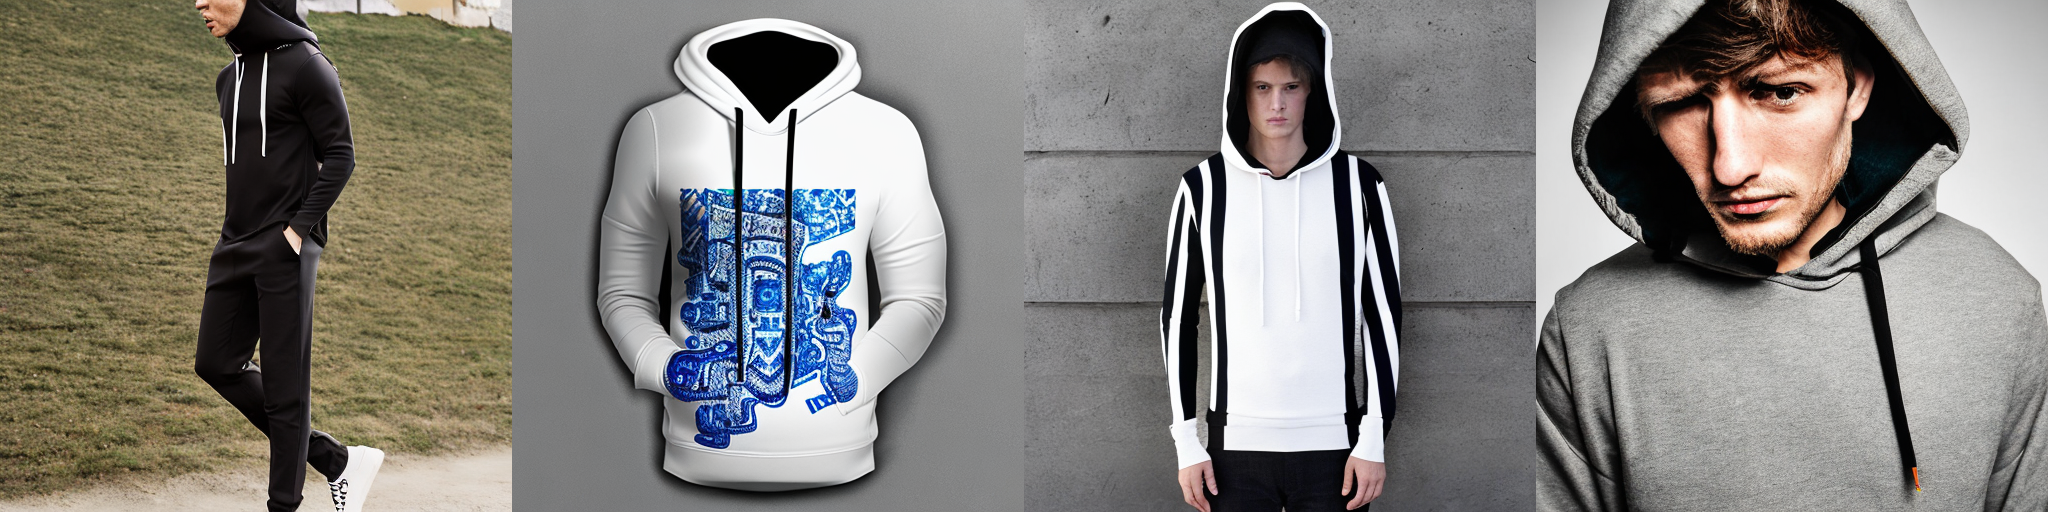

In [ ]:
# Stable Diffusion V2
model_path = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="black hoodie with a front half zipper by martin valen").images[0]
image1.save("ProductSnapAI_panel_1.png")

image2 = pipe(prompt="white hoodie with a blue design by martin valen").images[0]
image2.save("ProductSnapAI_panel_2.png")

image3 = pipe(prompt="stripped hoodie by martin valen").images[0]
image3.save("ProductSnapAI_panel_3.png")

image4 = pipe(prompt="camouflage hoodie by martin valen").images[0]
image4.save("ProductSnapAI_panel_4.png")

# Image grid helper function from HuggingFace
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid
